In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
from graphviz import Source
from IPython.display import SVG, display

In [5]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
d_n_c = pd.read_csv("dogs_n_cats.csv")
d_n_c

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [10]:
dnc = pd.get_dummies(d_n_c)

In [11]:
dnc

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_котик,Вид_собачка
0,15,18.0,1,1,0,0,1
1,20,24.0,1,0,0,0,1
2,34,40.8,1,1,0,0,1
3,26,31.2,1,1,0,0,1
4,16,19.2,1,1,0,0,1
...,...,...,...,...,...,...,...
995,8,3.2,1,0,1,1,0
996,7,2.8,1,0,1,1,0
997,6,2.4,1,0,1,1,0
998,7,2.8,1,0,1,1,0


In [37]:
dnc = d_n_c

In [38]:
X = dnc.drop(columns=['Вид'])
X

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [12]:
X = dnc.drop(columns=['Вид_котик', 'Вид_собачка'])
X

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0
...,...,...,...,...,...
995,8,3.2,1,0,1
996,7,2.8,1,0,1
997,6,2.4,1,0,1
998,7,2.8,1,0,1


In [39]:
y = dnc.loc[:, 'Вид']
y

0      собачка
1      собачка
2      собачка
3      собачка
4      собачка
        ...   
995      котик
996      котик
997      котик
998      котик
999      котик
Name: Вид, Length: 1000, dtype: object

In [47]:
y.unique()

array(['собачка', 'котик'], dtype=object)

In [57]:
np.sort(y.unique())

array(['котик', 'собачка'], dtype=object)

In [17]:
y = dnc.loc[:, 'Вид_котик']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Вид_котик, Length: 1000, dtype: uint8

In [40]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

## Plotting

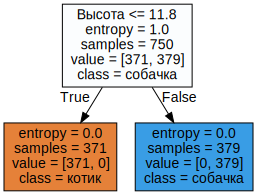

In [58]:
graph = Source(
    tree.export_graphviz(clf, 
                         out_file=None, 
                         feature_names=list(X),
                         class_names=np.sort(y.unique()), 
                         filled=True)
)
display(SVG(graph.pipe(format='svg')))

In [59]:
task_data = pd.read_json('dataset_209691_15.txt')
task_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,27,32.4,1,1,0
1,25,30.0,1,1,0
2,22,26.4,1,1,0
3,25,30.0,1,1,0
4,31,37.2,1,1,0
...,...,...,...,...,...
95,8,3.2,1,0,1
96,9,3.6,1,0,1
97,11,4.4,1,0,1
98,12,4.8,1,0,1


In [60]:
pred = clf.predict(task_data)

In [61]:
values, counts = np.unique(pred, return_counts=True)

In [62]:
values

array(['котик', 'собачка'], dtype=object)

In [63]:
counts

array([46, 54], dtype=int64)